In [1]:
from inicialization import *
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage.io import imread, imshow

video_path = 'DVD_181424_0.mpg'
file = 'prueba/'
videoToFrame(video_path).frame()

In [2]:
img = "Data/IMG_0500.png"
im = Image.open(img)
ima = np.array(im)

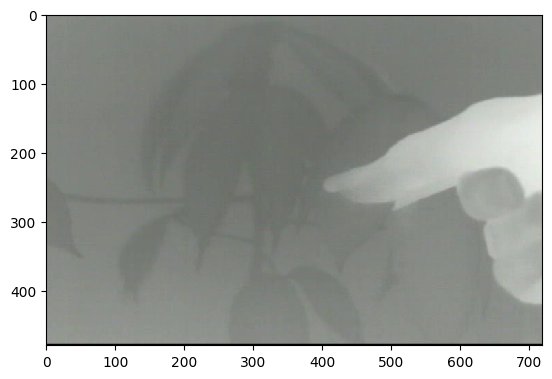

In [3]:
plt.imshow(ima, interpolation='nearest')
plt.show()

In [4]:
dark_image = imread("Data/IMG_0500.png")

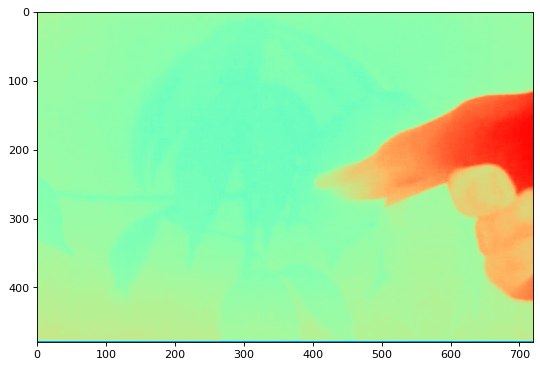

In [5]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='rainbow');

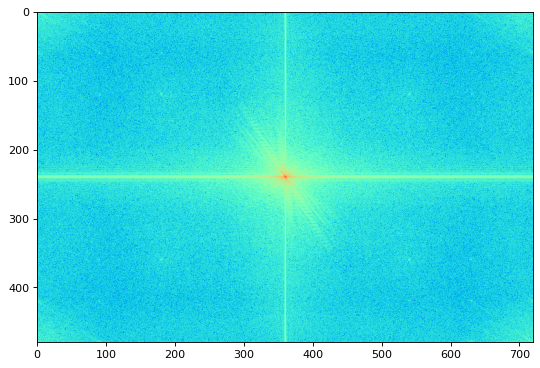

In [6]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='rainbow');

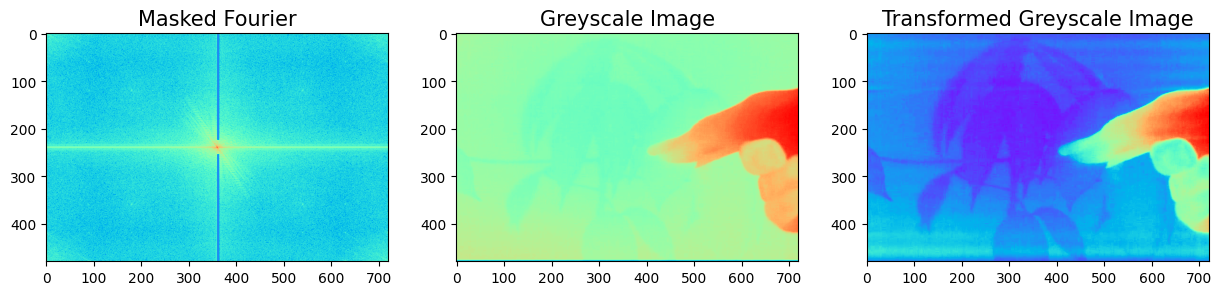

In [7]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 360:365] = i
    dark_image_grey_fourier[-225:,360:365] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='rainbow')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'rainbow')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='rainbow')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(dark_image, .1)

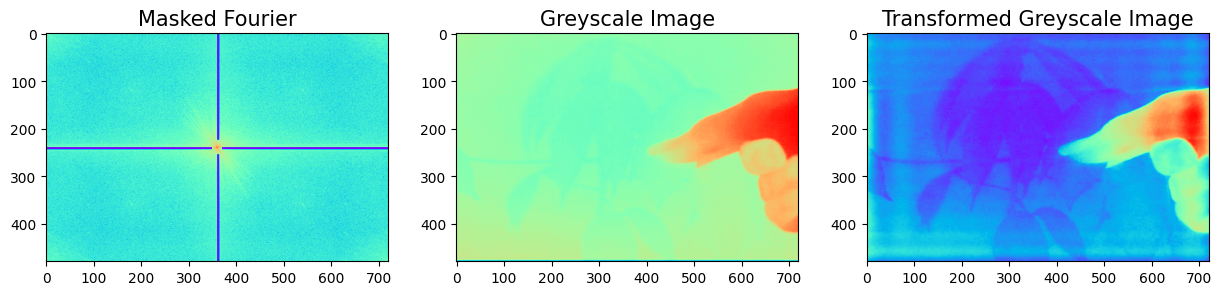

In [8]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[240:245, :350] = i
    dark_image_grey_fourier[240:245,-350:] = i
    dark_image_grey_fourier[:225, 360:365] = i
    dark_image_grey_fourier[-225:,360:365] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='rainbow')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'rainbow')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='rainbow')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
fourier_masker_hor(dark_image, .001)

import os
newpath = r'Data/' 
if not os.path.exists(newpath):
    os.makedirs(newpath)